# Analysing the host information including;age, location,gender and status for the possible prediction of outcome of recovery vs Death

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [14]:
data = pd.read_csv('data_results.csv')

# iterating the columns 
for col in data.columns: 
    print(col) 

# Preprocessing and cleaning the data

#important features
#important features
start_data_row = 0
Final_data_row = 1129
Data = data.loc[start_data_row:Final_data_row,['location','gender','age','status']]
#change the index of the data according to the length of the new data
Data.index = range(len(Data))


#getting rid of NaN data
Data.dropna(subset = ['status'], inplace=True)
Data.index = range(len(Data))


#getting rid of NaN data
Data.drop(Data.loc[Data['status']=='unknown'].index, inplace=True)

Data.drop(Data.loc[Data['status']=='n/a'].index, inplace=True)

Data.drop(Data.loc[Data['status']=='NA'].index, inplace=True)

Data.drop(Data.loc[Data['status']=='-'].index, inplace=True)

Data.drop(Data.loc[Data['status']=='Unknown'].index, inplace=True)
Data.index = range(len(Data))

#organizing the location based on the continent and country (For USA: continent,country, and state )
Location = Data.location.str.split('/')
listToStr_location = list()
for i in range(len(Location)):  
    if Location[i][1:2][0]!=' USA ':
        Location[i] = Location[i][0:2]
        listToStr_location. append(' '.join([str(elem) for elem in Location[i]]))
    else:
        Location[i] = Location[i][0:3]
        listToStr_location. append(' '.join([str(elem) for elem in Location[i]]))
listToStr_location

#replacing the age that were in months to year

Data['age'] = Data['age'].str.replace('months','')
Data['age'] = Data['age'].str.replace('month','')
Data['age'] = Data['age'].str.replace('s','')

for i in range(1,len(Data)):
    index_1 = Data.age[i].find(',') 
    index_2 = Data.age[i].find('-') 
    index_3 = Data.age[i].find('unknown') 
    index_4 = Data.age[i].find('week')
    index_5 = Data.age[i].find('Unknown') 
    if index_1!=-1:
        Data.age[i] = Data.age[i][:index_1]
        Data.age[i] = int(float(Data.age[i])/12)
    if index_2!=-1:
        Data.age[i] = int((float(Data.age[i][index_2+1:])+float(Data.age[i][:index_2]))/2)
    if index_3!=-1:
        Data.age[i] = 'NaN'
    if index_4!=-1:
        Data.age[i] = Data.age[i][:index_4]
        Data.age[i] = int(float(Data.age[i])/4)
    if index_5!=-1:
        Data.age[i] = 'NaN'



#deleting the >, 's and s from age
Data['age'] = Data['age'].str.replace('>','')
Data['age'] = Data['age'].str.replace('s','')
Data['age'] = Data['age'].str.replace("'",'')

Data.replace(['female','Female'],value= ['Female','Female'], inplace=True)
Data.replace(['male','Male'],value= ['Male','Male'], inplace=True)        

#the unknown gender is set to missing category
for i in range(1,len(Data)):
    index_4 = Data.gender[i].find('unknown') 
    if index_4!=-1:
        Data.gender[i] = 'missing'


#Labeling
Data.replace(['Deceased'],value= [1], inplace=True)
Data.status[Data['status'] != 1]=0

#using dummies instead of location data for ML input
Data_model = pd.concat([pd.get_dummies(Data[['location']]),pd.get_dummies(Data[['gender']]), Data[['age','status']]], axis=1)
Data_model.head()


virus_name
accession_id
type
lineage
passage_details_history
collection_date
location
host
additional_location_information
gender
age
status
specimen_source
additional_host_information
outbreak
last_vaccinated
treatment
sequencing_technology
assembly_method
coverage
comment
originating_lab
address
sample_id_given_by_the_sample_provider
submitting_lab
sample_id_given_by_the_submitting_laboratory
authors
submitter
submission_date
query
strand
%n
length(nt)
length(aa)
#muts
%muts
#uniquemuts
%uniquemuts
#existingmuts
%existingmuts
symbol
reference
uniquemutlist
existingmutlist
clade
ifexistspecialchar


,location_Africa / Morocco,location_Africa / Nigeria / Kwara State,location_Africa / Nigeria / Osun State,location_Africa / Nigeria / Oyo State,location_Asia / Bangladesh / Chattogram,location_Asia / Bangladesh / Dhaka,location_Asia / Bangladesh / Narayanganj,location_Asia / China / Beijing,location_Asia / China / Guangdong / Guangzhou,location_Asia / China / Heilongjiang / Harbin,...,location_South America / Colombia / Valle del Cauca / Trujillo,location_South America / Colombia / Valle del Cauca / Tulua,location_South America / Colombia / Valle del Cauca / Yumbo,location_South America / Colombia / Villavicencio / Meta,gender_Female,gender_Male,gender_Woman,gender_missing,age,status
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,43,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,85,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,42,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,48,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,23,0


In [15]:
#checking the balance in the data
Data_model['status'].value_counts()

0    969
1     41
Name: status, dtype: int64

# Logistic regression model

In [16]:
#Separating target (label) data
X = Data_model.drop('status',axis=1).astype(float)
y = Data_model.status
y=y.astype(int)
y.value_counts()


0    969
1     41
Name: status, dtype: int64

In [17]:
#splitting features and the label: 20% test data and 80% assigned to training data
# split into train/test sets with same class ratio
from sklearn.model_selection import KFold, cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

### Imputing the unknown data using KNN

In [18]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputer.fit(X_train[['age']])
X_train['age']=imputer.transform(X_train[['age']])
X_test['age']=imputer.transform(X_test[['age']])

C:\Users\Azadeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Azadeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### Balancing the data

In [19]:
#balancing the data
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
over = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_train, y_train = over.fit_resample(X_train, y_train)
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_train, y_train = under.fit_resample(X_train, y_train)


C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Scaling the data

In [20]:
#Scaling the data to standarize them
#Here caling reduced the iteration number from 200 to 50
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [21]:
#fitting the model and get the conversion probabilities. 
#predit_proba() function of our model assigns probability for each row:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', penalty='l2',C= 1, max_iter=200, n_jobs=1, tol=0.0001)
model.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
from sklearn.ensemble import  RandomForestRegressor
model_RFR = RandomForestRegressor(max_depth=10)

# fit the model with the training data
model_RFR.fit(X_train, y_train)

# predict the target on train and test data
predict_train = model_RFR.predict(X_train)
predict_test = model_RFR.predict(X_test)
feat_importances = pd.Series(model_RFR.feature_importances_, index = X.columns)

In [27]:
feat_importances.nlargest(7).values

array([0.50705784, 0.12127658, 0.07888492, 0.06240415, 0.05204171,
       0.03337604, 0.02901248])

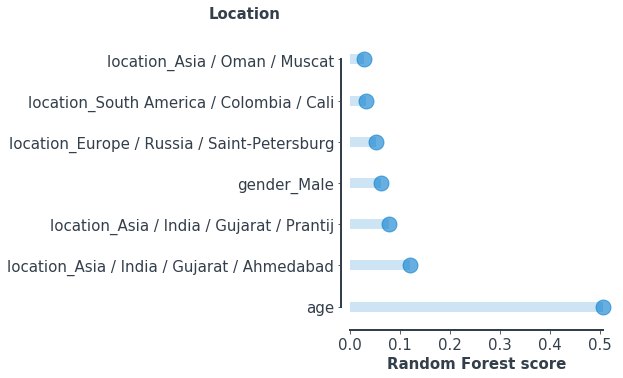

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# we first need a numeric placeholder for the y axis
my_range=list(range(1,len(feat_importances.nlargest(7))+1))

fig, ax = plt.subplots(figsize=(5,5))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
#plt.hlines(y=my_range, xmin=0, xmax=feat_importances.nlargest(7).values, color='#007acc', alpha=0.2, linewidth=10)

plt.hlines(y=my_range, xmin=0, xmax=feat_importances.nlargest(7).values, color='#007acc', alpha=0.2, linewidth=10)
# create for each expense type a dot at the level of the expense percentage value
plt.plot(feat_importances.nlargest(7).values, my_range, "o", markersize=15, color='#007acc', alpha=0.6)

#set labels
ax.set_xlabel('Random Forest score', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('')

# set axis
ax.tick_params(axis='both', which='major', labelsize=15)
plt.yticks(my_range, (feat_importances.nlargest(7).index))

# add an horizonal label for the y axis 
fig.text(-0.23, 0.96, 'Location', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))
